In [51]:
import yfinance as yf

In [62]:
tic = 'TSLA'
ticker = yf.Ticker(tic)
hist = ticker.history(period='10y')
df = hist[['Open','High','Low','Close','Volume']]
df = df.sort_index(ascending=False)
df

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,719.460022,744.489990,717.190002,729.770020,48533300
2020-12-31,699.989990,718.719971,691.119995,705.669983,49570900
2020-12-30,672.000000,696.599976,668.359985,694.780029,42846000
2020-12-29,661.000000,669.900024,655.000000,665.989990,22910800
2020-12-28,674.510010,681.400024,660.799988,663.690002,32278600
...,...,...,...,...,...
2011-01-11,5.718000,5.742000,5.384000,5.392000,8551000
2011-01-10,5.634000,5.736000,5.610000,5.690000,6713500
2011-01-07,5.600000,5.716000,5.580000,5.648000,11239500


In [63]:
btc = df[['Close']]
btc['daily_difference'] = btc['Close'].diff()
btc['signal'] = 0.0
btc['signal'] = np.where(btc['daily_difference'] > 0, 1.0, 0.0)
btc['positions'] = btc['signal'].diff()
btc

,Close,daily_difference,signal,positions
Date,,,,
2021-01-04,729.770020,NaN,0.0,NaN
2020-12-31,705.669983,-24.100037,0.0,0.0
2020-12-30,694.780029,-10.889954,0.0,0.0
2020-12-29,665.989990,-28.790039,0.0,0.0
2020-12-28,663.690002,-2.299988,0.0,0.0
...,...,...,...,...
2011-01-11,5.392000,0.000000,0.0,-1.0
2011-01-10,5.690000,0.298000,1.0,1.0
2011-01-07,5.648000,-0.042000,0.0,-1.0


For each day where Close Price = Buy = Red Arrow, & Sell = Green 


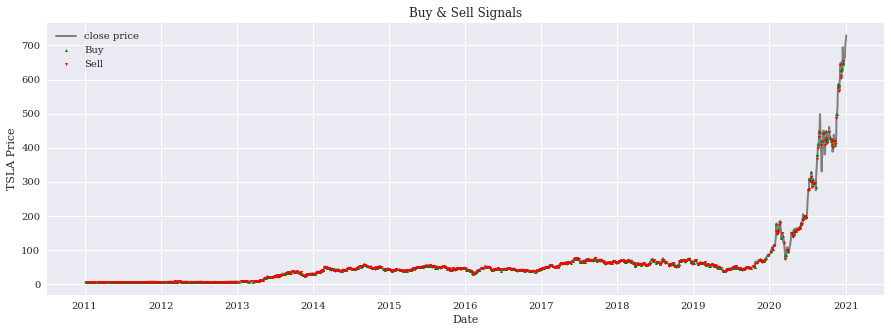

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
print('\033[4mFor each day where Close Price = Buy = Red Arrow, & Sell = Green \033[0m')

buys = btc.loc[btc['positions'] == 1]
sells = btc.loc[btc['positions'] == -1]

fig = plt.figure(figsize=(15,5))
plt.plot(btc.index, btc['Close'], color='gray', lw=2., label='close price')
plt.plot(buys.index, btc.loc[buys.index]['Close'], '^', markersize=3, color='g', label='Buy')
plt.plot(sells.index, btc.loc[sells.index]['Close'], 'v', markersize=3, color='r', label='Sell')
plt.ylabel(tic + ' Price')
plt.xlabel('Date')
plt.title('Buy & Sell Signals')
plt.legend(loc=0);

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pylab import mpl, plt
import yfinance as yf

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [61]:
symbol = 'SP500'
# tic = 'SPY'
tic = '^GSPC'
ticker = yf.Ticker(tic)
raw = ticker.history(period='5y', interval='1d')
# raw = ticker.history(, start='2010-01-01', end='2020-12-31', interval='1d')
raw.columns = ['Open', 'High', 'Low', symbol, 'Volume', 'Dividends', 'Stock Splits']
raw.tail()

,Open,High,Low,SP500,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3387030000,0,0
2020-12-30,3736.189941,3744.629883,3730.209961,3732.040039,3145200000,0,0
2020-12-31,3733.270020,3760.199951,3726.879883,3756.070068,3172510000,0,0
2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,5006680000,0,0
2021-01-05,3698.020020,3731.040039,3695.070068,3730.959961,1352800118,0,0


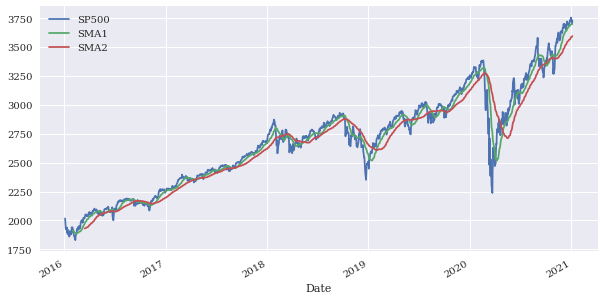

In [62]:
SMA1 = 20
SMA2 = 50

data1= pd.DataFrame(raw[symbol])
data1.columns = [symbol]
data1['SMA1'] = data1[symbol].rolling(SMA1).mean()
data1['SMA2'] = data1[symbol].rolling(SMA2).mean()
data1.plot(figsize=(10,5))
data1.tail();

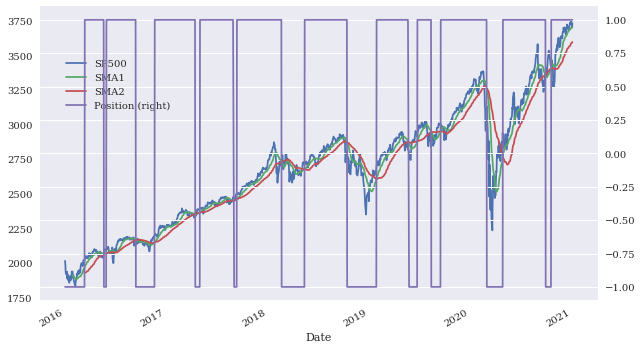

In [63]:
data1['Position'] = np.where(data1['SMA1'] > data1['SMA2'], 1, -1)
ax = data1.plot(secondary_y='Position', figsize=(10,6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

### Vectorized Backtesting
The vectorized backtesting can now be implemented as follows. First, the log returns are calculated. Then the positionings, represented as +1 or -1, are multiplied by the relevant log return. This simple calculation is possible since a long position earns the return of the Apple stock and a short position earns the negative return of the Apple stock. Finally, the log returns for the Apple stock and the algorithmic trading strategy based on SMAs need to be added up and the exponential function applied to arrive at the performance values:

In [64]:
data1['Returns'] = np.log(data1[symbol] / data1[symbol].shift(1))
data1['Strategy'] = data1['Position'].shift(1) * data1['Returns']
data1.round(4).tail()
data1.dropna(inplace=True)
print('')
np.exp(data1[['Returns', 'Strategy']].sum())
np.exp(data1[['Returns', 'Strategy']].std() * 252**0.5)

,SP500,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2020-12-29,3727.0400,3690.4355,3573.1158,1,-0.0022,-0.0022
2020-12-30,3732.0400,3693.9150,3579.2182,1,0.0013,0.0013
2020-12-31,3756.0701,3698.2680,3585.4772,1,0.0064,0.0064
2021-01-04,3700.6499,3699.9645,3590.7790,1,-0.0149,-0.0149
2021-01-05,3730.9600,3701.5565,3596.3284,1,0.0082,0.0082


Returns     1.850739
Strategy    1.482177
dtype: float64

Returns     1.212960
Strategy    1.213081
dtype: float64

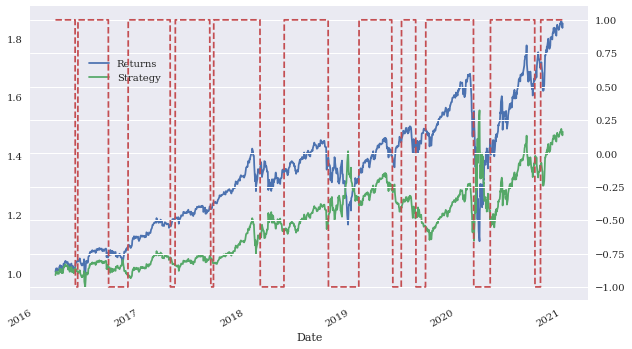

In [65]:
ax = data1[['Returns', 'Strategy']].cumsum(
    ).apply(np.exp).plot(figsize=(10,6))
data1['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [66]:
from itertools import product
# sma1 = range(20, 61, 4)
# sma2 = range(180, 281, 10)
sma1 = range(2, 65, 2)
sma2 = range(20, 283, 10)

results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):
    data1 = pd.DataFrame(raw[symbol])
    data1.dropna(inplace=True)
    data1['Returns'] = np.log(data1[symbol] / data1[symbol].shift(1))
    data1['SMA1'] = data1[symbol].rolling(SMA1).mean()             
    data1['SMA2'] = data1[symbol].rolling(SMA2).mean()             
    data1.dropna(inplace=True)             
    data1['Position'] = np.where(data1['SMA1'] > data1['SMA2'], 1, -1)             
    data1['Strategy'] = data1['Position'].shift(1) * data1['Returns']             
    data1.dropna(inplace=True)             
    perf = np.exp(data1[['Returns', 'Strategy']].sum())             
    results = results.append(pd.DataFrame(
        {'SMA1': SMA1, 'SMA2': SMA2,                          
        'MARKET': perf['Returns'],                          
        'STRATEGY': perf['Strategy'],                          
        'OUT': perf['Strategy'] - perf['Returns']},                          
        index=[0]), ignore_index=True)

results.sort_values('OUT', ascending=False).head(7)        

,SMA1,SMA2,MARKET,STRATEGY,OUT
407,32,40,1.878205,1.977248,0.099043
434,34,40,1.878205,1.875079,-0.003126
355,28,60,1.811374,1.777898,-0.033476
488,38,40,1.878205,1.831431,-0.046774
381,30,50,1.840432,1.761126,-0.079306
194,16,70,1.791337,1.695690,-0.095647
382,30,60,1.811374,1.692970,-0.118404


In [67]:
data = pd.DataFrame(raw[symbol])
data.columns = [symbol]
data['returns'] = np.log(data / data.shift(1)) * 100
data.fillna(0, inplace=True)
data['direction'] = np.sign(data['returns']).astype(int)

data.head()

,SP500,returns,direction
Date,,,
2016-01-05,2016.709961,0.000000,0
2016-01-06,1990.260010,-1.320216,-1
2016-01-07,1943.089966,-2.398582,-1
2016-01-08,1922.030029,-1.089754,-1
2016-01-11,1923.670044,0.085291,1


In [68]:
lags = 2
def create_lags(data, lags=2):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)


              Histogram of STOCK returns: 



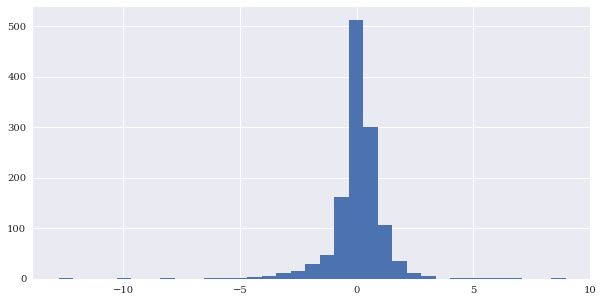

In [69]:
print('\n             \033[4m Histogram of STOCK returns: \033[0m\n')
data['returns'].hist(bins=35, figsize=(10,5));

In [70]:
create_lags(data)

data.dropna(inplace=True)
data.head()

,SP500,returns,direction,lag_1,lag_2
Date,,,,,
2016-01-07,1943.089966,-2.398582,-1,-1.320216,0.000000
2016-01-08,1922.030029,-1.089754,-1,-2.398582,-1.320216
2016-01-11,1923.670044,0.085291,1,-1.089754,-2.398582
2016-01-12,1938.680054,0.777251,1,0.085291,-1.089754
2016-01-13,1890.280029,-2.528238,-1,0.777251,0.085291


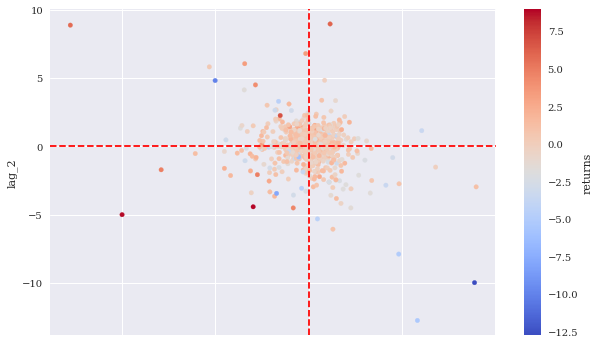

In [71]:
data.plot.scatter(x='lag_1', y='lag_2', c='returns', cmap='coolwarm', figsize=(10,6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--');

In [72]:
from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
data['pos_ols_1'] = model.fit(data[cols], data['returns']).predict(data[cols])
data['pos_ols_2'] = model.fit(data[cols], data['direction']).predict(data[cols])  
data[['pos_ols_1', 'pos_ols_2']].head()

data[['pos_ols_1', 'pos_ols_2']] = np.where(data[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)  

data['pos_ols_1'].value_counts()  
data['pos_ols_2'].value_counts()

(data['pos_ols_1'].diff() != 0).sum()  
(data['pos_ols_2'].diff() != 0).sum() 

,pos_ols_1,pos_ols_2
Date,,
2016-01-07,0.335665,0.212284
2016-01-08,0.404286,0.257336
2016-01-11,-0.006487,0.136953
2016-01-12,-0.097111,0.084683
2016-01-13,-0.101087,0.063811


 1    779
-1    479
Name: pos_ols_1, dtype: int64

 1    1199
-1      59
Name: pos_ols_2, dtype: int64

773

119

In [73]:
data['strat_ols_1'] = data['pos_ols_1'] * data['returns']
data['strat_ols_2'] = data['pos_ols_2'] * data['returns']
data[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

returns        1.954687e+27
strat_ols_1    3.961036e+56
strat_ols_2    6.270804e+69
dtype: float64

In [74]:
(data['direction'] == data['pos_ols_1']).value_counts()  

True     686
False    572
dtype: int64

In [75]:
(data['direction'] == data['pos_ols_2']).value_counts()  

True     716
False    542
dtype: int64

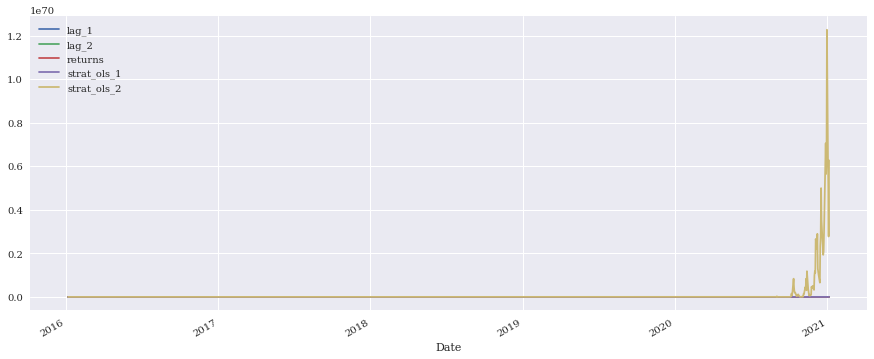

In [78]:
data[['lag_1', 'lag_2', 'returns', 'strat_ols_1', 'strat_ols_2']].cumsum(
    ).apply(np.exp).plot(figsize=(15, 6));

In [79]:
data

,SP500,returns,direction,lag_1,lag_2,pos_ols_1,pos_ols_2,strat_ols_1,strat_ols_2
Date,,,,,,,,,
2016-01-07,1943.089966,-2.398582,-1,-1.320216,0.000000,1,1,-2.398582,-2.398582
2016-01-08,1922.030029,-1.089754,-1,-2.398582,-1.320216,1,1,-1.089754,-1.089754
2016-01-11,1923.670044,0.085291,1,-1.089754,-2.398582,-1,1,-0.085291,0.085291
2016-01-12,1938.680054,0.777251,1,0.085291,-1.089754,-1,1,-0.777251,0.777251
2016-01-13,1890.280029,-2.528238,-1,0.777251,0.085291,-1,1,2.528238,-2.528238
...,...,...,...,...,...,...,...,...,...
2020-12-29,3727.040039,-0.222986,-1,0.868471,0.353035,-1,1,0.222986,-0.222986
2020-12-30,3732.040039,0.134065,1,-0.222986,0.868471,1,1,0.134065,0.134065
2020-12-31,3756.070068,0.641820,1,0.134065,-0.222986,-1,1,-0.641820,0.641820


### Clustering
This section applies k-means clustering, as introduced in “Machine Learning”, to financial time series data to automatically come up with clusters that are used to formulate a trading strategy. The idea is that the algorithm identifies two clusters of feature values that predict either an upward movement or a downward movement.

The following code applies the k-means algorithm to the two features as used before. Figure 15-9 visualizes the two clusters:

In [80]:
from sklearn.cluster import KMeans

In [81]:
model = KMeans(n_clusters=2, random_state=0)
model.fit(data[cols])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [82]:
data['pos_clus'] = model.predict(data[cols])
data['pos_clus'] = np.where(data['pos_clus'] == 1, -1, 1)
data['pos_clus'].values

array([ 1,  1, -1, ...,  1,  1,  1])

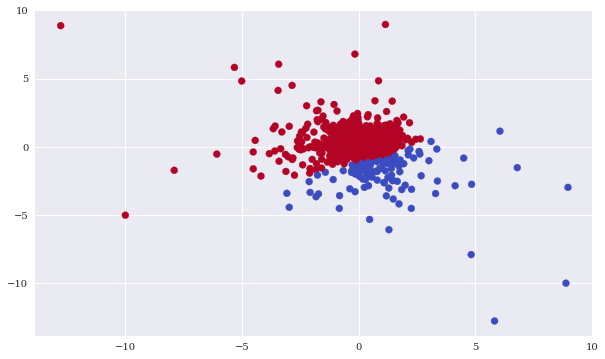

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(data[cols].iloc[:, 0], data[cols].iloc[:, 1],
                     c=data['pos_clus'], cmap='coolwarm');

Admittedly, this approach is quite arbitrary in this context—after all, how should the algorithm know what one is looking for? However, the resulting trading strategy shows a slight outperformance at the end compared to the benchmark passive investment (see Figure 15-10). It is noteworthy that no guidance (supervision) is given and that the hit ratio—i.e., the number of correct predictions in relationship to all predictions made—is less than 50%:

In [84]:
data['strat_clus'] = data['pos_clus'] * data['returns']
data[['returns', 'strat_clus']].sum().apply(np.exp)

returns       1.954687e+27
strat_clus    1.520069e+49
dtype: float64

In [85]:
(data['direction'] == data['pos_clus']).value_counts()

True     700
False    558
dtype: int64

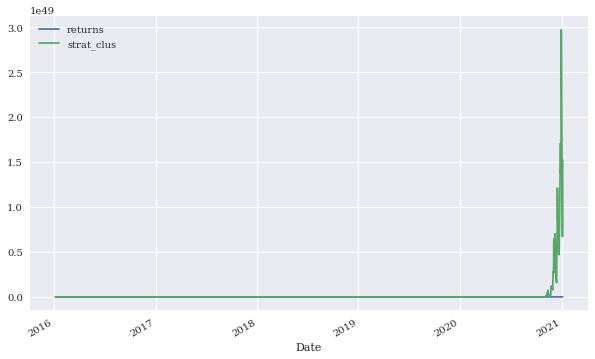

In [86]:
data[['returns', 'strat_clus']].cumsum(
                 ).apply(np.exp).plot(figsize=(10, 6));

In [1]:
def create_bins(data, bins=[0]):
    globalcols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)  
        cols_bin.append(col_bin)

In [ ]:
create_bins(data)

In [ ]:
data[cols_bin + ['direction']].head() 

In [2]:
grouped = data.groupby(cols_bin + ['direction'])
grouped.size()

IndentationError: unexpected indent (<ipython-input-2-347856611547>, line 2)

In [ ]:
res = grouped['direction'].size().unstack(fill_value=0) 

In [ ]:
def highlight_max(s):
             is_max = s == s.max()
             return ['background-color: yellow' if v else '' for v in is_max]

In [ ]:
res.style.apply(highlight_max, axis=1)